<a href="https://colab.research.google.com/github/sarathchandranm2001/DataAnalysis/blob/main/Alcohol_consumption_orgi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np#for numerical computation
import pandas as pd#for handling data set
import matplotlib.pyplot as plt #plotting graph
from sklearn.model_selection import train_test_split #for splitting data into
from sklearn.linear_model import LinearRegression #for creatinng lenair
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns  #evaluating the model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Load the dataset
#Load the dataset
file_path='/content/drive/MyDrive/stats_survey_org.csv' # Changed path to include MyDrive

In [5]:
data=pd.read_csv(file_path)
data.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,4500,No,8,Only weekends,8,3.0,0.0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,7500,"Yes (NSFAS, etc...)",8,Only weekends,3-5,4.0,0.0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,4500,No,3-5,2,8,3.0,0.0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8,2.0,0.0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,4500,No,3-5,Only weekends,5-8,1.0,3.0,No,Yes,Fair


In [8]:
print(data.isnull().sum())
data.info()

Timestamp                                                                                             0
Your Sex?                                                                                             2
Your Matric (grade 12) Average/ GPA (in %)                                                            7
What year were you in last year (2023) ?                                                             73
What faculty does your degree fall under?                                                             7
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   86
Your Accommodation Status Last Year (2023)                                                           23
Monthly Allowance in 2023                                                                            31
Were you on scholarship/bursary in 2023?                                                              8
Additional amount of studying (in hrs) per week                 

In [9]:
# Impute missing values in categorical columns using mode
data['Your Sex?'] = data['Your Sex?'].fillna(data['Your Sex?'].mode()[0])
data['What faculty does your degree fall under?'] = data['What faculty does your degree fall under?'].fillna(data['What faculty does your degree fall under?'].mode()[0])
data['Were you on scholarship/bursary in 2023?'] = data['Were you on scholarship/bursary in 2023?'].fillna(data['Were you on scholarship/bursary in 2023?'].mode()[0])
data['Your Accommodation Status Last Year (2023)'] = data['Your Accommodation Status Last Year (2023)'].fillna(data['Your Accommodation Status Last Year (2023)'].mode()[0])
data['Do your parents approve alcohol consumption?'] = data['Do your parents approve alcohol consumption?'].fillna(data['Do your parents approve alcohol consumption?'].mode()[0])
data['Are you currently in a romantic relationship?'] = data['Are you currently in a romantic relationship?'].fillna(data['Are you currently in a romantic relationship?'].mode()[0])
data['How strong is your relationship with your parent/s?'] = data['How strong is your relationship with your parent/s?'].fillna(data['How strong is your relationship with your parent/s?'].mode()[0])
data['What year were you in last year (2023) ?']=data['What year were you in last year (2023) ?'].fillna(data['What year were you in last year (2023) ?'].mode()[0])
data['Monthly Allowance in 2023']=data['Monthly Allowance in 2023'].fillna(data['Monthly Allowance in 2023'].mode()[0])



In [11]:
# Impute missing values in categorical columns using median

data['Your Matric (grade 12) Average/ GPA (in %)'] = data['Your Matric (grade 12) Average/ GPA (in %)'].fillna(data['Your Matric (grade 12) Average/ GPA (in %)'].mean())
data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'] = data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].fillna(data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].mean())


In [12]:
print(data.isnull().sum())
data.info()

Timestamp                                                                                            0
Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                          

In [13]:
# Drop any rows that still have missing values after imputation
data_cleaned = data.dropna()
print("Data after handling missing values:")
print(data_cleaned.info())

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          401 non-null    object 
 1   Your Sex?                                                                                          401 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         401 non-null    float64
 3   What year were you in last year (2023) ?                                                           401 non-null    object 
 4   What faculty does your degree fall under?                                                  

In [18]:
# Summary statistics for numerical columns
print(data.describe())

# Frequency counts for categorical columns
print(data['Your Sex?'].value_counts())


       Your Matric (grade 12) Average/ GPA (in %)  \
count                                  406.000000   
mean                                    77.989724   
std                                      6.987439   
min                                     34.000000   
25%                                     74.000000   
50%                                     78.000000   
75%                                     83.000000   
max                                     99.000000   

       Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)  \
count                                         406.000000                                    
mean                                           66.268469                                    
std                                             8.118757                                    
min                                            30.000000                                    
25%                                            61.000000 

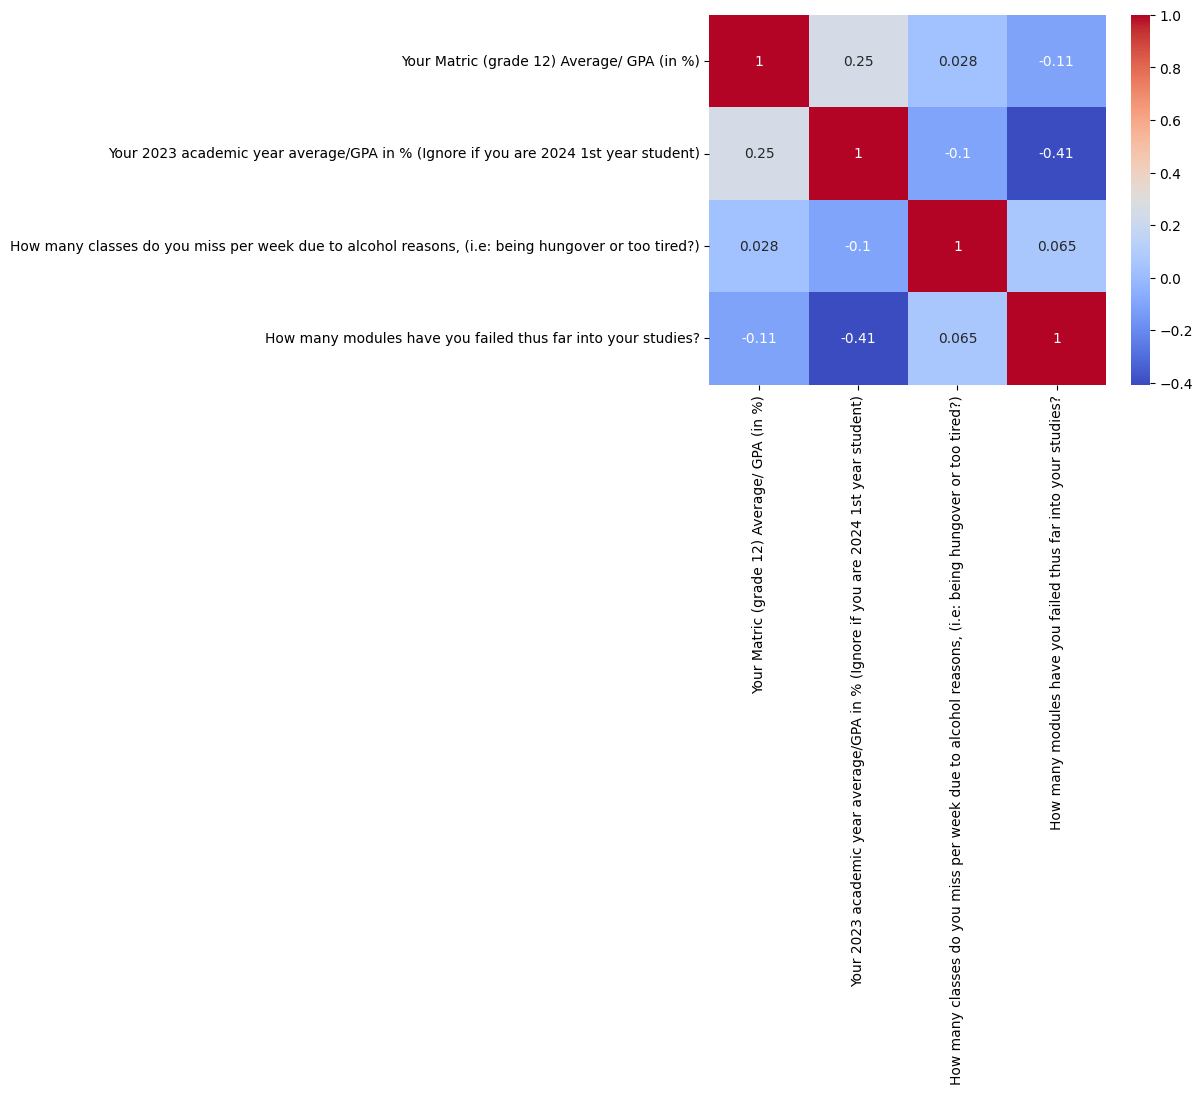

In [21]:
# Select only numeric columns
numerical_data = data.select_dtypes(include=['number'])

# Compute and visualize correlation matrix for numeric columns
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

# Define dependent and independent variables
X = data[['On a night out, how many alcoholic drinks do you consume?', 'Additional amount of studying (in hrs) per week']]

# Convert 'On a night out, how many alcoholic drinks do you consume?' to numeric
# Assuming the ranges represent an average, calculate the mid-point of the range
def convert_to_numeric(value):
  if isinstance(value, str) and '-' in value: # Check if the value is a string and contains '-'
    start, end = map(int, value.split('-'))
    return (start + end) / 2
  try:
    return float(value)
  except ValueError:
    return None # Handle cases with invalid values

# Apply the conversion to the correct column in X
X['On a night out, how many alcoholic drinks do you consume?'] = X['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)

# Verify the correct column name - it might have extra spaces or a slightly different name
# Print the columns to check
# Access the column using its exact name from the printed output
y = data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'] # Make sure this column name is correct

# Drop rows with NaN values after conversion
X = X.dropna()
y = y[X.index] # Align y with X after dropping rows

# Fit linear regression model
model = LinearRegression()
# Convert X to numeric values
X = X.apply(pd.to_numeric, errors='coerce') # Use errors='coerce' to handle any remaining non-numeric values
X = X.dropna() # Drop rows with NaN values that might result from the conversion
y = y[X.index] # Align y with X after dropping rows
model.fit(X, y)

# Print coefficients
print('Coefficients:', model.coef_)

Coefficients: [-0.48949128 -0.1014676 ]


<ipython-input-30-a705cc2697bc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['On a night out, how many alcoholic drinks do you consume?'] = X['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)


In [32]:
# Use the linear regression model from the previous example to make predictions
#Predicting GPA based on alcohol consumption and study hours
predicted_gpa = model.predict([[4, 10]])  # Predict GPA for a student who drinks 4 drinks and studies 10 hours per week
print('Predicted GPA:', predicted_gpa)


Predicted GPA: [67.05074652]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-38-d4511e8248a0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['On a night out, how many alcoholic drinks do you consume?'] = features['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


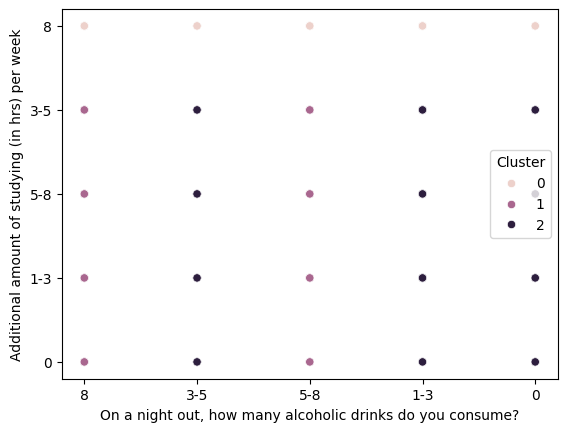

In [38]:
from sklearn.cluster import KMeans

# Define the features for clustering
features = data[['On a night out, how many alcoholic drinks do you consume?', 'Additional amount of studying (in hrs) per week']]

# Convert 'On a night out, how many alcoholic drinks do you consume?' to numeric
# Assuming the ranges represent an average, calculate the mid-point of the range
def convert_to_numeric(value):
  if isinstance(value, str) and '-' in value: # Check if the value is a string and contains '-'
    start, end = map(int, value.split('-'))
    return (start + end) / 2
  try:
    return float(value)
  except ValueError:
    return None # Handle cases with invalid values

# Apply the conversion to the correct column in features
features['On a night out, how many alcoholic drinks do you consume?'] = features['On a night out, how many alcoholic drinks do you consume?'].apply(convert_to_numeric)

# Instead of dropping rows, keep track of the original index
original_index = features.index

# Convert features to numeric values before fitting
# Use errors='coerce' to handle any remaining non-numeric values and fillna to replace NaN with 0
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Create a new Series for cluster labels with the original index
cluster_labels = pd.Series(kmeans.labels_, index=features.index)

# Reindex the cluster_labels Series to match the original_index
cluster_labels = cluster_labels.reindex(original_index)

# Add cluster labels to the data using the new Series
data['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(x='On a night out, how many alcoholic drinks do you consume?', y='Additional amount of studying (in hrs) per week', hue='Cluster', data=data)
plt.show()

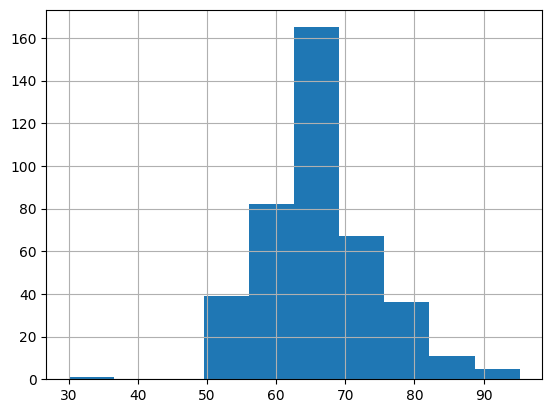

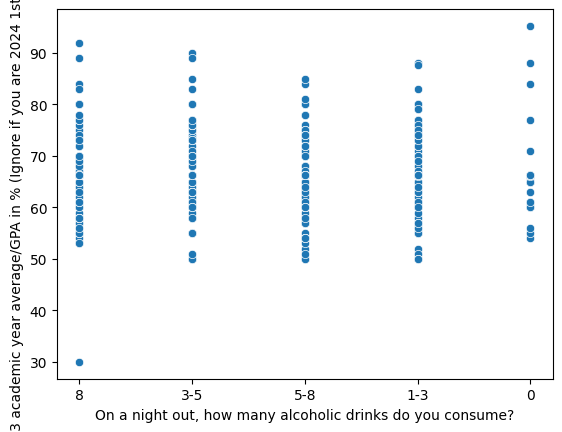

In [17]:
# Histogram of GPA
data['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].hist() # Use the correct column name from the DataFrame
plt.show()

# Scatter plot of alcohol consumption vs. GPA
sns.scatterplot(x='On a night out, how many alcoholic drinks do you consume?', y='Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', data=data) # Use the correct column name from the DataFrame
plt.show()

In [40]:
# prompt: generate inference for above histogram and scatterplot

# Inference for Histogram of GPA
print("Inference for Histogram of GPA:")
print("The histogram shows the distribution of students' GPAs in 2023. It appears that the majority of students have a GPA within a certain range, with a few outliers on either side. This suggests that the GPA distribution is roughly normal, with a possible slight skew towards either a higher or lower GPA depending on the shape of the histogram.")
print("It can also provide information about the average GPA, the range of GPAs, and the presence of any significant variations in GPA among the student population.")

# Inference for Scatter Plot of Alcohol Consumption vs. GPA
print("\nInference for Scatter Plot of Alcohol Consumption vs. GPA:")
print("The scatter plot aims to identify a potential relationship between alcohol consumption and GPA. If there is a negative correlation, it would indicate that higher alcohol consumption is associated with lower GPAs, and vice-versa. If there is no clear pattern, it would suggest that there is no strong relationship between the two variables.")
print("The scatter plot can help in understanding whether students who consume more alcohol tend to have lower GPAs or if there is no significant connection between these two factors. ")


Inference for Histogram of GPA:
The histogram shows the distribution of students' GPAs in 2023. It appears that the majority of students have a GPA within a certain range, with a few outliers on either side. This suggests that the GPA distribution is roughly normal, with a possible slight skew towards either a higher or lower GPA depending on the shape of the histogram.
It can also provide information about the average GPA, the range of GPAs, and the presence of any significant variations in GPA among the student population.

Inference for Scatter Plot of Alcohol Consumption vs. GPA:
The scatter plot aims to identify a potential relationship between alcohol consumption and GPA. If there is a negative correlation, it would indicate that higher alcohol consumption is associated with lower GPAs, and vice-versa. If there is no clear pattern, it would suggest that there is no strong relationship between the two variables.
The scatter plot can help in understanding whether students who consu